<a href="https://colab.research.google.com/github/allen44/dogs-of-zurich/blob/main/dogs_of_zurich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will examine the data on the dogs and owners of Zurich, and then make recommendations on a marketing strategy that will help a pet products business most efficiently target their marketing efforts.

# Imports

In [ ]:
! pip install -U pandas numpy seaborn matplotlib pandas-profiling

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
%cd "/content/drive/MyDrive/Colab Notebooks/dogs-of-zurich"
pwd = "/content/drive/MyDrive/Colab Notebooks/dogs-of-zurich"
!pwd

/content/drive/MyDrive/Colab Notebooks/dogs-of-zurich
/content/drive/MyDrive/Colab Notebooks/dogs-of-zurich


In [38]:
# Config Kaggle API Key and download data
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/API Keys"

!kaggle datasets download -d kmader/dogs-of-zurich --unzip  

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 33.7MB/s]


In [39]:
!ls

20151001hundehalter.csv  20170308hundehalter.csv
20160307hundehalter.csv  zuordnungstabellehunderassehundetyp.csv


# Merge imported data

In [40]:
df = {}
for i, file in enumerate(os.listdir(pwd)):
  df[i] = pd.read_csv(file)

Map the german-language columns names to English column names.

In [41]:
df[0]=df[0].rename(columns={'HALTER_ID':'id','ALTER': 'age', 'GESCHLECHT':'gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color'})
df[1]=df[1].rename(columns={'HALTER_ID':'id','ALTER': 'age', 'GESCHLECHT':'gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color'})
df[2]=df[2].rename(columns={'HALTER_ID':'id','ALTER': 'age', 'GESCHLECHT':'gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color'})

Merge the 3 dataframes

In [42]:
df=pd.concat((df[0], df[1], df[2]))

In [43]:
df

,HUNDERASSE,HUNDERASSENTYP_KURZ,HUNDERASSENTYP,id,age,gender,district,quarter,primary_breed,RASSE1_MISCHLING,secondary_breed,RASSE2_MISCHLING,RASSENTYP,dob,dog_gender,color
0,Affenpinscher,K,Kleinwüchsig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghane,I,Rassentypenliste I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanischer Windhund,I,Rassentypenliste I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Airedale Terrier,I,Rassentypenliste I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Akita Inu,I,Rassentypenliste I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,NaN,NaN,NaN,130723.0,31-40,w,7.0,74.0,Yorkshire Terrier,NaN,NaN,NaN,K,2009.0,w,braun
6926,NaN,NaN,NaN,130724.0,31-40,m,3.0,33.0,Labrador Retriever,NaN,NaN,NaN,I,2015.0,m,silber
6927,NaN,NaN,NaN,130727.0,51-60,w,11.0,119.0,Mischling gross,NaN,NaN,NaN,I,2005.0,w,schwarz/beige
6928,NaN,NaN,NaN,130727.0,51-60,w,11.0,119.0,Australian Shepherd,NaN,Labrador Retriever,NaN,I,2014.0,w,schwarz


# EDA

In [44]:
# Drop rows that are entirely 'nan'
df = df.dropna(how='all')

In [45]:
df['age'].unique()

array([nan, '51-60', '61-70', '41-50', '71-80', '31-40', '81-90', '21-30',
       '91-100', '11-20'], dtype=object)

In [46]:
df['dob'].value_counts()

2012.0    1244
2013.0    1154
2010.0    1134
2009.0    1121
2011.0    1112
2014.0    1108
2008.0    1022
2007.0     990
2006.0     908
2005.0     868
2004.0     826
2003.0     610
2015.0     593
2002.0     512
2001.0     317
2000.0     210
1999.0      98
1998.0      54
1997.0      14
2016.0       3
1996.0       2
1994.0       2
5012.0       2
1980.0       2
1.0          1
8.0          1
1962.0       1
1995.0       1
Name: dob, dtype: int64

Drop the 'dob' that are too small and too large.

In [47]:
df = df.drop(df[df['dob']<1900].add(df[df['dob']>2022]).index)

In [48]:
df.dtypes

HUNDERASSE              object
HUNDERASSENTYP_KURZ     object
HUNDERASSENTYP          object
id                     float64
age                     object
gender                  object
district               float64
quarter                float64
primary_breed           object
RASSE1_MISCHLING        object
secondary_breed         object
RASSE2_MISCHLING       float64
RASSENTYP               object
dob                    float64
dog_gender              object
color                   object
dtype: object

Let's change the dtypes so that categorical features can be analyzed correctly.

In [49]:
df = pd.concat((df[['id', 'gender', 'district', 'quarter', 'primary_breed', 'dog_gender', 'color']].astype('category'),
                  df['age'].astype('category'),
                  pd.to_datetime(df['dob'], format='%Y')), axis=1) \
                  .reset_index(drop=True)

In [50]:
df.dtypes

id                     category
gender                 category
district               category
quarter                category
primary_breed          category
dog_gender             category
color                  category
age                    category
dob              datetime64[ns]
dtype: object

In [51]:
df.isna().sum()

id               361
gender           361
district         365
quarter          365
primary_breed    361
dog_gender       361
color            361
age              365
dob              361
dtype: int64

Let's check the profiling report to see which features look interesting.

In [52]:
from pandas_profiling import ProfileReport

report = ProfileReport(df, minimal=True)

In [53]:
report

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The histograms of ID, gender, district, primary breed, dog gender, color, age, and dob look interesting. Let's take a closer look.

Let's see if we can drop the rows with one or more null values without losing too many rows.

In [54]:
# Count rows with missing values vs rows without missing values
df.isna().sum()


id               361
gender           361
district         365
quarter          365
primary_breed    361
dog_gender       361
color            361
age              365
dob              361
dtype: int64

In [55]:
# Fraction of rows with na values
len(df.dropna()) / len(df)

0.974269087849681

Looks good. Less than 3% of the data has NA values.

In [56]:
df = df.dropna()

## ID

In [57]:
id_count_max = df.groupby('id').count().sum(axis=1).divide(8).astype(int).max()
id_count_max


26

It's kind of interesting that the max number of dogs for a single owner is 26. But that's a outlier so it's not too useful for a company trying to sell dog products in Zurich.

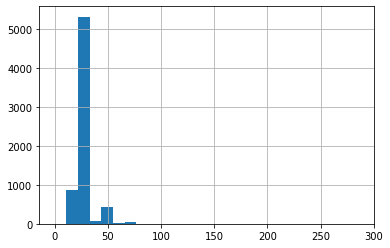

In [311]:
df.groupby('id').count().sum(axis=1).hist(bins=id_count_max);

<AxesSubplot:ylabel='Count'>

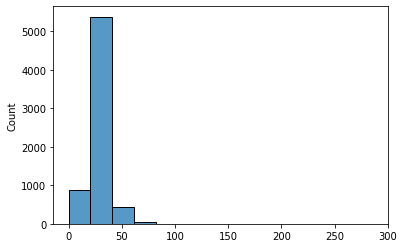

In [307]:
sns.histplot(df.groupby('id').count().sum(axis=1))

In [60]:
(df.groupby('id').count().sum(axis=1).divide(8).astype(int).value_counts()/len(df))[:5]

2    0.382268
1    0.062752
4    0.030512
3    0.004893
6    0.003382
dtype: float64

Interesting. The most common number of dogs for a single owner is 2 (38% of dog owners), followed by 1 (6%), then 4 (3%).

One possible reason for this is that that people may believe that the ideal number of dogs to own is 2. From this, we can infer that anyone who owns 1 dog (6% of dog owners) may be in the market for a second dog in the near future.

What kind of person would own 26 dogs in a dense city like Zurich? Let's take a look at the data.

In [61]:
# View all the data on the top dog owner
df[df['id']==82452]

,id,gender,district,quarter,primary_breed,dog_gender,color,age,dob
1008,82452.0,w,10.0,102.0,Dachshund,w,schwarz/rot,61-70,2005-01-01
1009,82452.0,w,10.0,102.0,Dachshund,w,schwarz/rot,61-70,1999-01-01
1010,82452.0,w,10.0,102.0,Dachshund,w,rot,61-70,2005-01-01
1011,82452.0,w,10.0,102.0,Dachshund,w,rot,61-70,1998-01-01
1012,82452.0,w,10.0,102.0,Dachshund,m,rot,61-70,2009-01-01
1013,82452.0,w,10.0,102.0,Dachshund,w,rot/braun,61-70,2006-01-01
1014,82452.0,w,10.0,102.0,Dachshund,m,braun,61-70,2008-01-01
1015,82452.0,w,10.0,102.0,Dachshund,w,schwarz/grau,61-70,2009-01-01
1016,82452.0,w,10.0,102.0,Dachshund,w,schwarz/rot,61-70,1998-01-01
1017,82452.0,w,10.0,102.0,Dachshund,w,schwarz/rot,61-70,1999-01-01


We see that its a 61-70 year old woman with 26 dachsunds: 22 females and 4 males. Many  of the dogs have the same dob, meaning they were born on the same day. This woman is likely to be a dog breeder. 

## Gender

<AxesSubplot:xlabel='gender', ylabel='Count'>

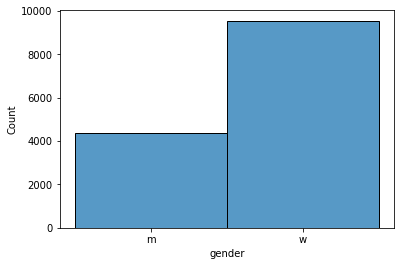

In [64]:
sns.histplot(df['gender'])

Most of the dog owners in Zurich are women. If market products to dog owners in Zurich, it may make business sense to target the marketing toward the women first.

## Dog Gender

<AxesSubplot:xlabel='dog_gender', ylabel='Count'>

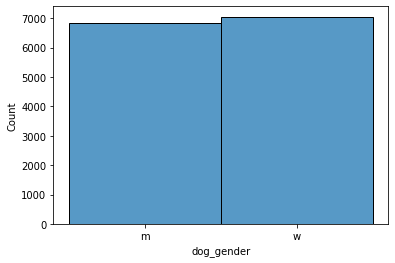

In [65]:
sns.histplot(df['dog_gender'])

The genders of the dogs are approzamately equal, so there's likely little business advantage to marketing based on the dogs gender alone.

## Color

<AxesSubplot:xlabel='color', ylabel='Count'>

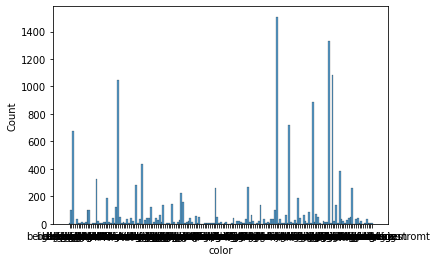

In [66]:
sns.histplot(df['color'])

That's not a helpful chart. Let's see why.

In [67]:
(df['color'].value_counts()/len(df))

schwarz          0.108520
tricolor         0.095783
weiss            0.077720
braun            0.075273
schwarz/weiss    0.063615
                   ...   
gold/schwarz     0.000144
gelb/braun       0.000144
creme/schwarz    0.000144
gemischt         0.000144
silber/weiss     0.000072
Name: color, Length: 169, dtype: float64

Map the german color names to English.

In [99]:
from collections import defaultdict
  
def default_value():
    return "other"
      
# Defining the dict


color_dict =  defaultdict(lambda: 'other',
                          {'beige': 'beige',
                          'schwarz': 'black',
                          'blau': 'blue',
                          'braun': 'brown',
                          'gold': 'gold',
                          'grün': 'green',
                          'grau': 'grey',
                          'orange': 'orange',
                          'rosa': 'pink',
                          'rot': 'red',
                          'silber': 'silver',
                          'türkis': 'turquiose',
                          'weiß': 'white',
                          'gelb': 'yellow',
                          'tricolor': 'tri-color',
                          'creme': 'cream',
                           'schwarz/weiss': 'black/white',
                           'schwarz/braun': 'black/brown',
                           'braun/weiss': 'brown/white',
                           'weiss/braun': 'white/brown'})

df['eng_color'] = df['color'].map(color_dict).astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


We can see that there are 169 unique colors. Let's focus on only the ten most popular colors.

<AxesSubplot:xlabel='eng_color'>

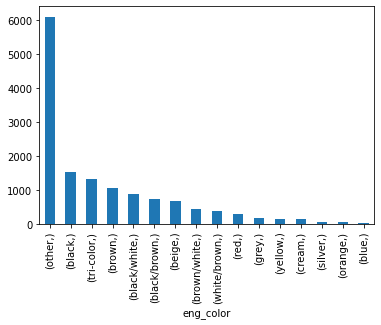

In [315]:
df[['eng_color']].value_counts().plot(kind='bar')

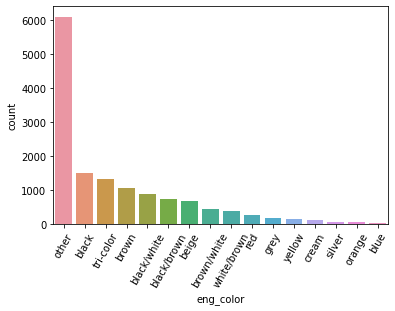

In [145]:
sns.countplot(x=df['eng_color'],
              order = df['eng_color'].value_counts().index)
plt.xticks(rotation=60);

The most popular colors are black, tri-color, brown, and black/white but it would not make business sense to direct marketing to these colors as there is no particularly strong preference for any one color among the dog owners.

## DOB

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df[df['dob'].dt.year>1995]['dob'], ax=ax[0])
sns.histplot(df[df['dob'].dt.year>1995]['dob'], cumulative=True, stat='density', ax=ax[1]);

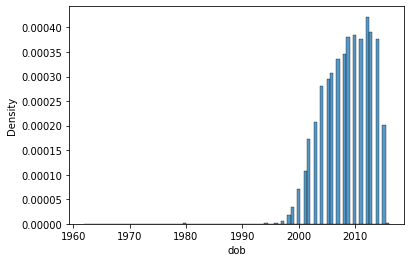

In [152]:
sns.histplot(df['dob'], stat='density');

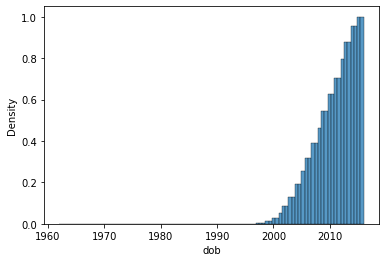

In [153]:
sns.histplot(df['dob'], cumulative=True, stat='density');

There are some outlier old dogs out there. Let's exclude them so we can focus on the most common dogs.

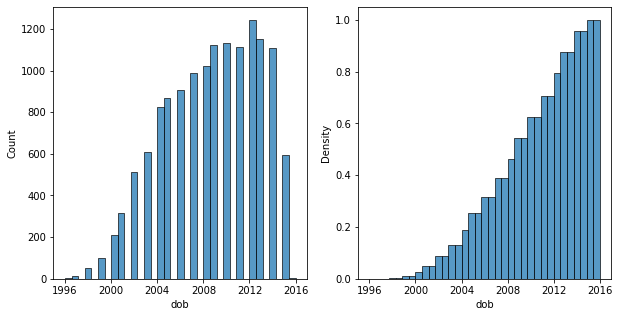

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df[df['dob'].dt.year>1995]['dob'], ax=ax[0])
sns.histplot(df[df['dob'].dt.year>1995]['dob'], cumulative=True, stat='density', ax=ax[1]);

Thsi is data from 2016, so about half of the dogs are 8 years old and under. There are very few dogs under one year in the data, possibly because it's common for owners to wait until after the first year to register their dogs.

As dog ages are widely distributed, there might not be a business reason to target marketing b ased on the age of the dogs alone.


## Primary Breed

<AxesSubplot:xlabel='primary_breed', ylabel='count'>

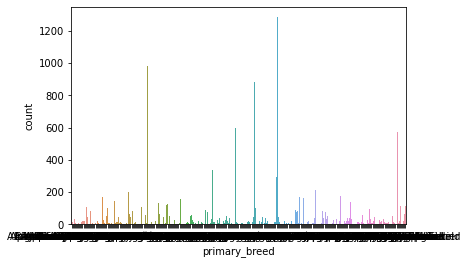

In [178]:
sns.countplot(x=df['primary_breed'])

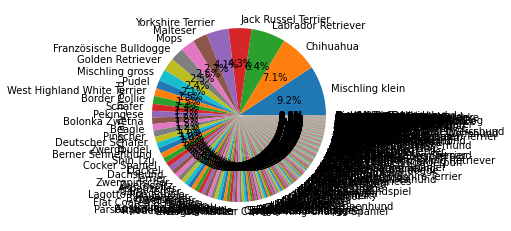

In [219]:
df['primary_breed'].value_counts().plot.pie(autopct="%.1f%%");

That's a lot of dog breeds. Let's focus on the most popular ones only, as many breeds are too niche to warrant being a marketing target.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:ylabel='common_breeds'>

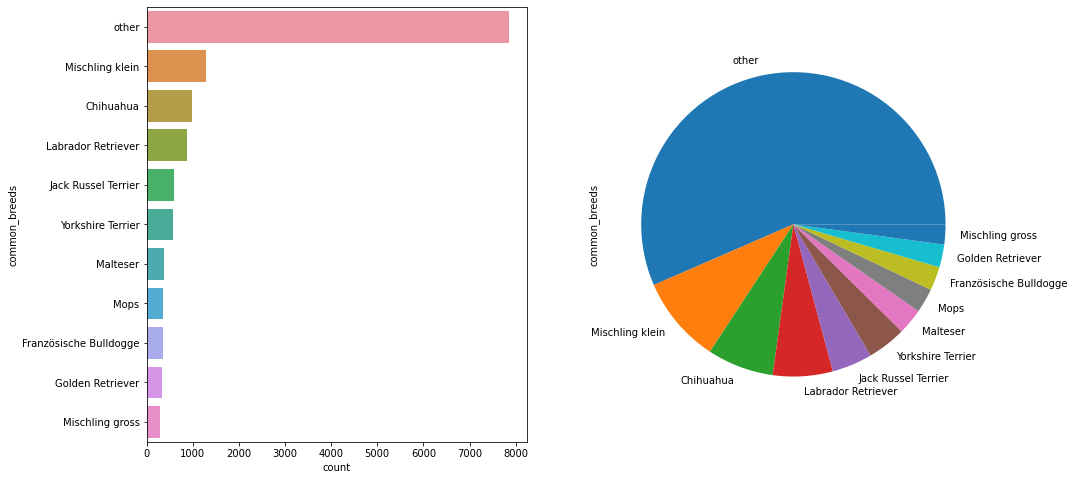

In [291]:
# Map each breed to itself, except those outside the top 10
common_breed_dict = defaultdict(lambda: 'other')
for breed, count in zip(df['primary_breed'].astype('string').value_counts().index[:10],
                        df['primary_breed'].astype('string').value_counts()[:10]):
  common_breed_dict[breed] = breed
df['common_breeds'] = df['primary_breed'].map(common_breed_dict).astype('category')

# Plot the new series
fig, ax = plt.subplots(1,2, figsize=(15, 8))
sns.countplot(y=df['common_breeds'],
              order=df['common_breeds'].value_counts().index,
              ax=ax[0])

df['common_breeds'].value_counts().plot.pie()


The most common dog is 'misching klien' which means 'mixed small'. The most common pure breeds are chihuahua labrador, Jack Russel Terrier,  and Yorkshire Terrier. Most of these breeds are small dogs. This makes sense as Zurich is a desnse city and small dogs are suitable for small living areas.

It would make business sense to have most of the marketing target owners of small dogs, and less marketing toward owners of large dogs, when considering the popularity of the breeds alone. There may be certain case where targeting owners of large dogs makes sense, such as in certain less dense districts where large dogs are more common.



## District

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:ylabel='district'>

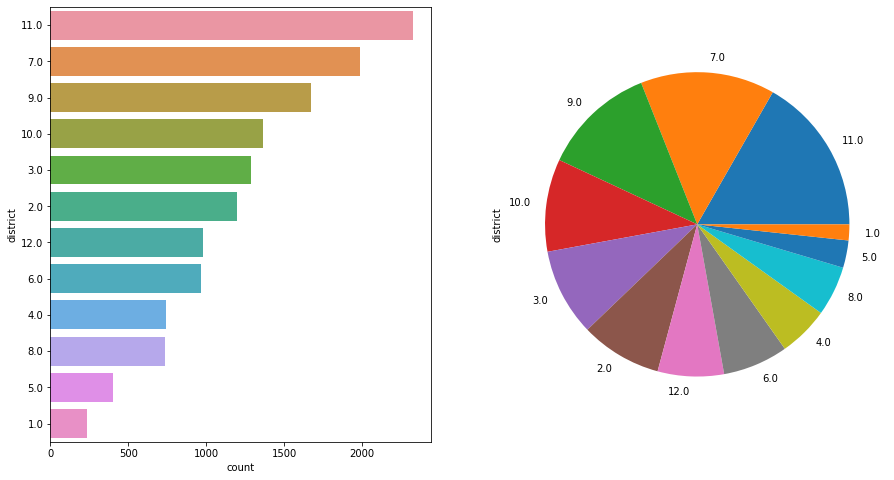

In [261]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
sns.countplot(y=df['district'],
              order=df['district'].value_counts().index,
              ax=ax[0])

df['district'].value_counts().plot.pie()

More than half of all dogs are in districts 11, 7, 9, and 10. All else equal, it makes business sense to place storefronts in these districts.

## Quarter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:ylabel='common_quarter'>

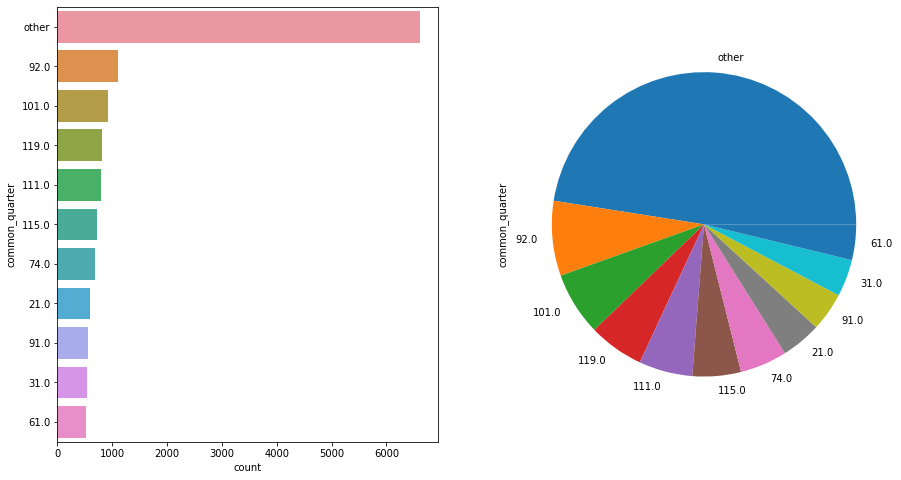

In [289]:
common_quarter_dict = defaultdict(lambda: 'other')
for quarter, count in zip(df['quarter'].astype('string').value_counts().index[:10],
                        df['quarter'].astype('string').value_counts()[:10]):
  # Map each quarter to itself, except those outside the top 10
  common_quarter_dict[quarter] = quarter

df['common_quarter'] = df['quarter'].astype('string').map(common_quarter_dict).astype('category')

fig, ax = plt.subplots(1,2, figsize=(15, 8))
sns.countplot(y=df['common_quarter'],
              order=df['common_quarter'].value_counts().index,
              ax=ax[0])

df['common_quarter'].value_counts().plot.pie()

More than half of all dogs are in 11 of the 33 quarters. All else equal, it makes more sense to place storefronts in these quarters instead of the other 22 quarters.

## Owner's Age

<AxesSubplot:ylabel='age'>

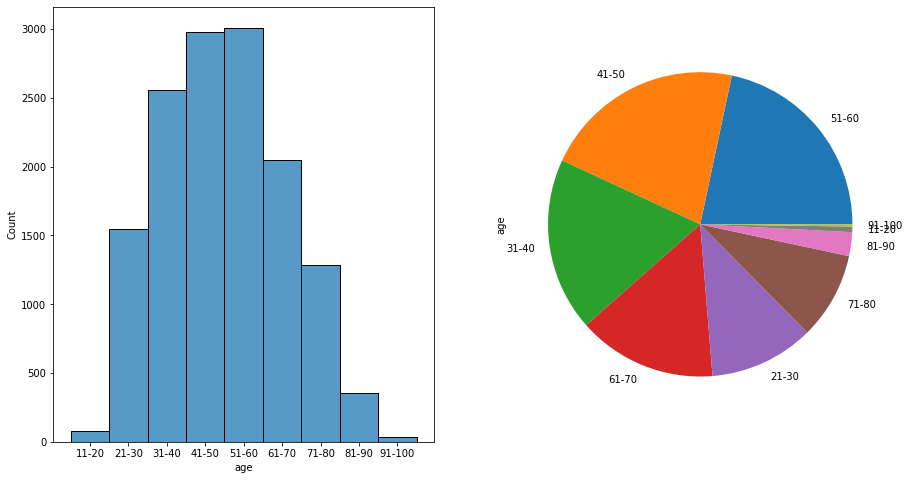

In [301]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
sns.histplot(df['age'],
             ax=ax[0])

df['age'].value_counts().plot.pie()

The most common age for dog owners in Zurich is 51-60, followed by 41-50.

The demographic of 41-60 owns almost half of all dogs in Zurich.

Targeting this demographic first would be a good use of the marketing budget.

# Conclusion

After studying at the data of dog owners in Zurich, we can recommend some high-level demographic targets marketing campaign for a business that want to increases sales of pet products to dog owners in Zurich.

Targets
1. Number of dogs owned: 1 and 2 
1. Owner Gender: Women
1. Primary Breed: 'all small breeds'
1. Dog's age: 1 - 8 years
1. Districts that hold half of all dogs: 11, 7, 9, and 10
1. Quarters that hold half of all dogs:: 92, 101, 119, 111, 115, 74, 21, 91, 31, 61

Non-targets
1. Dog gender
1. Dog color
